In [9]:
# Import libs
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

import shapefile

%matplotlib inline

In [2]:
# read data in pandas dataframe
raw = pd.read_csv('movie_metadata.csv')

In [3]:
# Basic picture of the data
print(raw.info())
print('------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

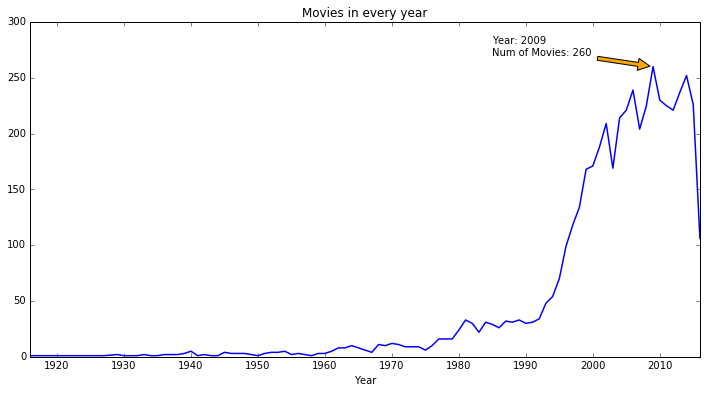

In [4]:
# How many movies released every year
# Notice that most of the movies without title_year are TV shows
# Drop those shows to generate movie_raw to display
raw[raw['title_year'].isnull()].movie_title
movie_raw = raw[raw['title_year'].notnull()]
movie_ave_y = movie_raw.groupby('title_year')['movie_title'].count()
m = movie_ave_y.max()
my = int(movie_ave_y.idxmax())
fig = plt.figure(figsize=(12,6), dpi=250)
plt.xticks(np.linspace(1910,2020,12,endpoint=True))
ax = fig.add_subplot(111)
ax = movie_ave_y.plot(title='Movies in every year', linewidth=1.5)
ax.set_xlabel('Year')
ax.annotate('Year: %d \nNum of Movies: %d' % (my, m), xy=(my, m), xytext=(1985, 270), arrowprops=dict(facecolor='orange', shrink=0.05))

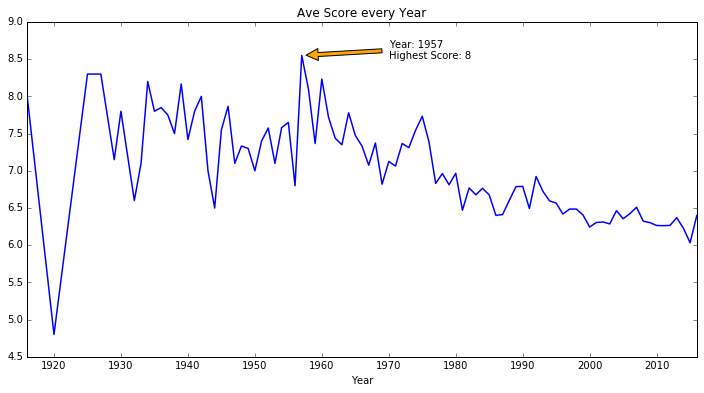

In [5]:
# How are the mean scores every year
ave_score = movie_raw.groupby('title_year')['imdb_score'].mean()
m_score=ave_score.max()
score_y=int(ave_score.idxmax())
fig2=plt.figure(figsize=(12, 6), dpi=250)
plt.xticks(np.linspace(1910,2020,12,endpoint=True))
ax2 = fig.add_subplot(111)
ax2 = ave_score.plot(title='Ave Score every Year', linewidth=1.5)
ax2.set_xlabel('Year')
ax2.annotate('Year: %d \nHighest Score: %d' % (score_y, m_score), xy=(score_y, m_score), xytext=(1970, 8.5), arrowprops=dict(facecolor='orange', shrink=0.05))

count    4.935000e+03
mean     8.486459e+04
std      1.396016e+05
min      5.000000e+00
25%      8.946000e+03
50%      3.498500e+04
75%      9.788800e+04
max      1.689764e+06
Name: num_voted_users, dtype: float64
------------------------------------------


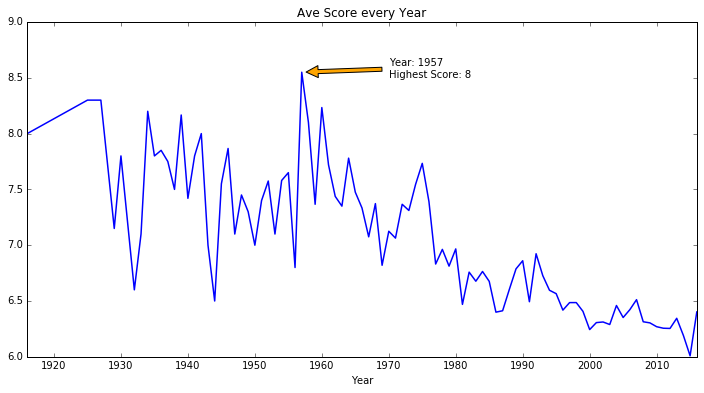

In [6]:
# There are some movies that have few voters which may have 'bad' impact on the mean scores
# What if we drop the movies which have few voters
# Drop those movies that num of voters less than 100
print(movie_raw.num_voted_users.describe())
print('------------------------------------------')
droped_movie_raw = movie_raw[movie_raw.num_voted_users>=100]
droped_ave_score = droped_movie_raw.groupby('title_year')['imdb_score'].mean()
dm_score=droped_ave_score.max()
score_dy = int(droped_ave_score.idxmax())
fig3 = plt.figure(figsize=(12, 6), dpi=250)
plt.xticks(np.linspace(1910,2020,12,endpoint=True))
ax3 = fig.add_subplot(111)
ax3 = droped_ave_score.plot(title='Ave Score every Year', linewidth=1.5)
ax3.set_xlabel('Year')
ax3.annotate('Year: %d \nHighest Score: %d' % (score_dy, dm_score), xy=(score_dy, dm_score), xytext=(1970, 8.5), arrowprops=dict(facecolor='orange', shrink=0.05))

In [7]:
# Countries and Movies
raw_countries = raw[raw.country.notnull()]
cm = raw_countries['country']
cm.replace(['USA','UK','South Korea','West Germany','Soviet Union','Dominican Republic','Czech Republic'], 
           value=['United States','United Kingdom','Korea','Germany','Russia','Dominican Rep.','Czech Rep.'],inplace=True)
cmcount=cm.groupby(cm).count()
cmlist=cmcount.index.values.tolist()

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:3443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


(255,
 5,
 [-179.9999999999999, -90.0, 0.0, 0.0],
 [180.0000000000002, 83.63410065300012, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0xb142fd0>)

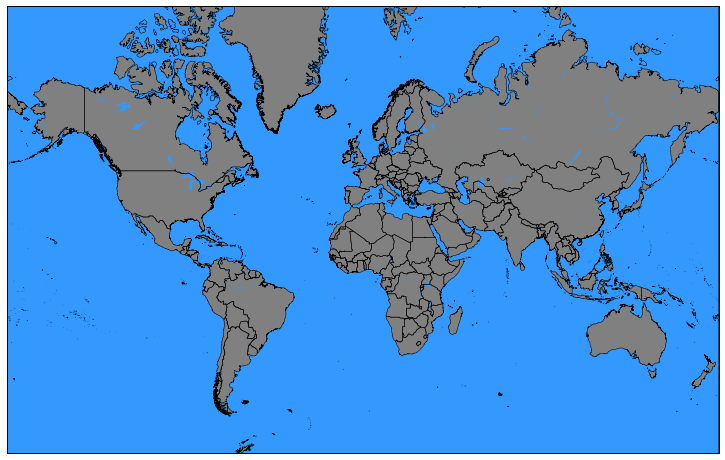

In [8]:

f=plt.figure(figsize=(16,8))
map=Basemap(projection='merc',llcrnrlat=-65,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
map.drawmapboundary(fill_color='#3399FF')
map.fillcontinents(color='grey',lake_color='#3399FF')
map.readshapefile('./ne_10m_admin_0_countries/ne_10m_admin_0_countries','admin')

In [ ]:
patches   = []

for name in cmlist:
    for info, shape in zip(map.admin_info, map.admin):
        if info['NAME'] == name:
            patches.append( Polygon(np.array(shape), True) )
        
ax.add_collection(PatchCollection(patches, facecolor= 'm', edgecolor='k', linewidths=1., zorder=2))

In [11]:
sf=shapefile.Reader('./ne_10m_admin_0_countries/ne_10m_admin_0_countries')

In [19]:
records=sf.records()

In [21]:
records[0][8]

TypeError: list indices must be integers or slices, not str

In [46]:
rn=[r[17] for r in records]

In [47]:
for name in cmlist:
    if name not in rn:
        print(name)

New Line
Official site


In [ ]:
w=sf.Writer(sf.)